In [17]:
import numpy as np
import pandas as pd
import os

## Ideas:

784 inputs, 2 hidden layers, 0-9 as output

Each neuron object should have weights, bias and value.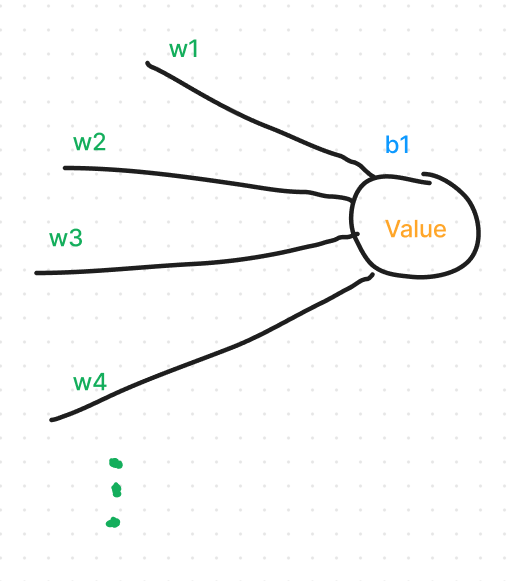


## Quesitons:
How to determine the number of nodes in the hidden layer?

How many hidden layers should there be?


In [29]:
dataframe = pd.read_csv('./digit-recognizer/train.csv')
dataframe = dataframe.iloc[41:42]
print(dataframe)
PIXEL_COUNT = len(dataframe.columns) - 1
SAMPLE_SIZE = len(dataframe)

    label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
41      1       0       0       0       0       0       0       0       0   

    pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
41       0  ...         0         0         0         0         0         0   

    pixel780  pixel781  pixel782  pixel783  
41         0         0         0         0  

[1 rows x 785 columns]


In [30]:
def sigmoid(x):
    # Activation function: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

In [31]:
def deriv_sigmoid(x):
    # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
    fx = sigmoid(x)
    return fx * (1 - fx)

In [32]:
def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays of the same length.
    return ((y_true - y_pred) ** 2).mean()

In [33]:
class Neuron:
    def __init__(self, weights, bias, value=0):
        self.weights = weights # weights type: numpy array
        self.bias = bias # bias type: float
        self.value = value
    
    def print_self(self):
        # debug function
        value = self.value
        print(value)

In [59]:
class NeuralNetwork:
    def __init__(self, hidden_layers):
        # hidden_layer: list of number of nodes in the hidden layer
        
        self.network = [[]]
        self.learning_rate = 0.1
        self.epochs = 1
        
        # initialize input layer (zeroth layer)
        for i in range(PIXEL_COUNT):
            # no weight or bias, only value is important
            weights = np.empty(0)
            bias = 0
            neuron = Neuron(weights, bias)
            self.network[0].append(neuron)
            
        # initialize hidden layers
        weight_size = 0
        for i in range(len(hidden_layers)):
            # append a list that contains all neurons in this hidden layer
            weight_size = PIXEL_COUNT if i == 0 else hidden_layers[i]
            self.network.append([])
            for n in range(hidden_layers[i]):
                weights = np.random.uniform(low=0.0, high=10.0, size=weight_size)
                bias = np.random.normal()
                neuron = Neuron(weights, bias, 0.5)
                self.network[-1].append(neuron)
                
        # initialize output layer
        self.network.append([])
        for i in range(10):
            weights = np.random.uniform(low=0.0, high=10.0, size=weight_size)
            bias = np.random.normal()
            neuron = Neuron(weights, bias, 0.5)
            self.network[-1].append(neuron)
       
    
    
    
    def get_layer_values(self, index):
        # return a list of all neuron values in the layer
        layer = self.network[index]
        values = []
        for neuron in layer:
            values.append(neuron.value)
        return values
    
    
    
    
    def set_layer_values(self, index, values):
        layer = self.network[index]
        for i in range(len(layer)):
            layer[i].value = values[i]
    
    
    
    
    def feed_forward(self, neuron_node, input_values):
        ### feed forward algorithm:
        #
        
        # neuron_node --> target neuron node to be updated
        # input_values --> all neuron values from the previous layer
        
        # input_values and weights are np arrays of the same length
        new_value = np.dot(neuron_node.weights, input_values) + neuron_node.bias 
        neuron_node.value = sigmoid(new_value)
        return neuron_node
    
    
    
    
    def find_weight(self, neuron_1, neuron_2):
        ### find the connection weight between 2 nuerons
        
        return 0.3
        
    
    
    
    def train(self, labels, images):
        # labels --> the correct digit for the image
        # images --> a list of image np array (2d list)
        
        # iterate through the dataset
        for epoch in range(self.epochs):
            for label, image in zip(labels, images):
                # set input layer value
                self.set_layer_values(0, image)
                
                ### do feed forward for all layers one by ones
                for i in range(1, len(self.network)):
                    
                    # start with 2nd layer (the 1st hidden layer)
                    layer = self.network[i]
                    
                    for neuron in layer: 
                        neuron = self.feed_forward(neuron, image)
                        
                    # update image to value of the neuron from ones layer before
                    new_image = []
                    for n in range(len(layer)):
                        new_image.append(layer[n].value)
                    image = new_image
                    
                  
                
                ### Back Propogation !!!
                
                # get number of neurons in each layer
                layer_sizes = []
                for layer in self.network: layer_sizes.append(len(layer))
                
                ## create 3d list of partial derivatives of JUST weights
                # [ network_level [ layer_level [ neuron_level ]]]
                weights_partial_derivatives = []
                for i in range(len(self.network) - 1):
                    layer = self.network[i+1]
                    
                    # layer level
                    layer_weights_partial_derivatives = []
                    # list of neuron values in the previous layer
                    layer_values = self.get_layer_values(i)
                    
                    for neuron in layer:
                        # neuron level
                        neuron_weights_partial_derivatives = []
                        # neuron has many weights, add weight derivatives one at a time
                        for value in layer_values:
                            # partial derivative calculation
                            temp_value = np.dot(layer_values, neuron.weights) + neuron.bias
                            d_neuron_d_weight = value * deriv_sigmoid(temp_value)
                            
                            neuron_weights_partial_derivatives.append(d_neuron_d_weight)
                            
                        layer_weights_partial_derivatives.append(neuron_weights_partial_derivatives)  
                    
                    weights_partial_derivatives.append(layer_weights_partial_derivatives)
                
                
                
                ## partial derivatives between two neuron values
                # 2d list, each sublist are partial derivatives between layers
                
                value_value_partial_derivatives = []
                for i in range(2, len(self.network)):
                    layer = self.network[i]
                    prev_layer = self.network[i-1]
                    
                    layer_value_partial_derivatives = []
                    
                    layer_values = self.get_layer_values(i-1)
                    next_layer_values = self.get_layer_values(i)
                    for p in range(len(prev_layer)):
                        neuron_value_partial_derivatives = []
                        for n in range(len(layer)):
                            prev_neuron = prev_layer[p]
                            neuron = layer[n]
                            
                            temp_value = np.dot(layer_values, neuron.weights) + neuron.bias
                            weight = neuron.weights[p]
                            
                            d_neuron_d_neuron = weight * deriv_sigmoid(temp_value)
                            print(weight)
                            
                
                
        
    
        
    def print_network(self, layer_index):
        # debug function
        layer = self.network[layer_index]
        for neuron in layer:
            neuron.print_self()
    

In [60]:
# dataframe.iloc[0][1:] --> first row as input layer
digit_recognition_network = NeuralNetwork([28, 28])

labels = dataframe.iloc[:, 0].to_numpy()
images = dataframe.iloc[:, 1:].to_numpy()


digit_recognition_network.train(labels, images)
# digit_recognition_network.print_network(3)

5.705264525835565
9.782280551573939
0.9517860152736257
4.7737180169540725
4.599299860802927
5.734539696483032
6.248141498012903
0.22524601353948182
6.860438097650746
5.681600457845368
2.3093115175248755
1.066597622710601
2.221208594725268
1.326957465804186
1.5197908656651238
0.8732639647433837
4.561348525770457
3.6504728508462394
0.8663694639379382
2.9243134812424323
4.658281943579979
0.969923568089337
0.8105279565625256
7.403189824324212
4.976381646974374
8.376298803973805
8.150391319845433
8.979590874695752
7.047364651139379
7.378292134315929
6.781469103554635
6.290361342566811
1.254301816489971
9.117088556453911
6.28841182861938
2.8484807560846805
3.3113833046564647
8.903689693905292
0.2142040286268354
6.519063257304562
4.215765076823079
5.237074890706682
2.469039089350514
3.1483039149721392
2.5461862462262577
7.79656958324888
2.172386516574436
1.299470907305872
4.84505337843024
4.741582341189206
7.404732355697607
2.0916784249689115
3.6564184728791336
8.589406496248143
0.27195267892